In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ps=[2,5,7,9]
0.1*np.random.rand(2*ps[0])

array([0.08776065, 0.04899434, 0.07067411, 0.04756422])

# Generating and solving 1-k-sat problems for k=2,3

## n is number of variables, m is number of clauses

In [2]:
import numpy as np
from itertools import combinations
import exact_cover as ec
Seed=123
def P1in3SAT(n, m):
    # generate instance of positive 1-in-3 SAT
    # n is number of variables, m is number of clauses
    #np.random.seed()
    A = np.zeros((n, m), dtype=int)
    for i in range(m):
        clause = np.random.choice(n, 3, replace=False)
        col = [1 if k in clause else 0 for k in range(n)]
        A[:, i] = col
    return A

def P1in2SAT(n, m):
    # generate instance of positive 1-in-2 SAT
    # n is number of variables, m is number of clauses
    #np.random.seed(Seed)
    A = np.zeros((n, m), dtype=int)
    for i in range(m):
        clause = np.random.choice(n, 2, replace=False)
        col = [1 if k in clause else 0 for k in range(n)]
        A[:, i] = col
    return A

def solve_instances(A_list):
    # solve positive 1-k-SAT problem
    num = A_list.shape[0]
    sol_bool = np.zeros(num, dtype=int)
    for i in range(num):
        sol = ec.get_exact_cover(A_list[i])
        #print('sol',sol)
        if len(sol) > 0:
            sol_bool[i] = 1
    return sol_bool



#   Probability of SAT for  1-3-SAT (checking where phase transition occurs)

In [ ]:
# r=m/n for different n and different m/n we calculate the probablity of SAt



r=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.3,1.5,2,2.5,3]


nlist=[10]
prob_Sat=np.zeros((len(nlist),len(r)))
num=10
for q in range(len(nlist)):
    
    mlist=[nlist[q]*r[i] for i in range(len(r))]
    kk=-1
    for i in range(len(mlist)):
       
        kk=kk+1
        Alist=[]
        for _ in range(num):
            

            Alist.append(P1in3SAT(int(nlist[q]), int(mlist[i])))

        x=solve_instances(np.array(Alist, dtype='int32'))
      
        
        count=np.count_nonzero(x==0)
        
        prob_Sat[q,kk]=((num-count)/num)

In [4]:
# r=m/n for different n and different m/n we calculate the probablity of SAt



r=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.3,1.5,2,2.5,3]


nlist=[10,20,50,100]
prob_Sat=np.zeros((len(nlist),len(r)))

for q in range(len(nlist)):
    mlist=[nlist[q]*r[i] for i in range(len(r))]
    kk=-1
    for i in range(len(mlist)):

        kk=kk+1
        Alist=[]
        for _ in range(100):

            Alist.append(P1in2SAT(int(nlist[q]), int(mlist[i])))

        x=solve_instances(np.array(Alist, dtype='int32'))
        count=np.count_nonzero(x==0)
        
        prob_Sat[q,kk]=((100-count)/100)

Text(0, 0.5, 'Probability of SAT')

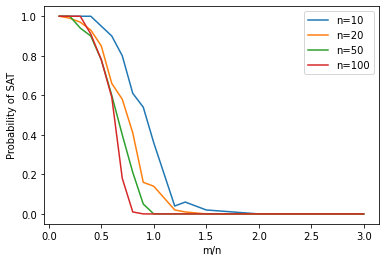

In [5]:

import matplotlib.pyplot as plt
for q in range(len(nlist)):
    plt.plot(r,prob_Sat[q])
legend=plt.legend(('n=10','n=20','n=50','n=100'))
plt.xlabel('m/n')
plt.ylabel('Probability of SAT')

#   Probability of SAT for  1-3-SAT (checking where phase transition occurs)

In [6]:
# r=m/n for different n and different m/n we calculate the probablity of SAt



r=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.3,1.5,2,2.5,3]


nlist=[10,20,50,100]
prob_Sat=np.zeros((len(nlist),len(r)))

for q in range(len(nlist)):
    mlist=[nlist[q]*r[i] for i in range(len(r))]
    kk=-1
    for i in range(len(mlist)):

        kk=kk+1
        Alist=[]
        for _ in range(100):

            Alist.append(P1in2SAT(int(nlist[q]), int(mlist[i])))

        x=solve_instances(np.array(Alist, dtype='int32'))
        count=np.count_nonzero(x==0)
        
        prob_Sat[q,kk]=((100-count)/100)

Text(0, 0.5, 'Probability of SAT')

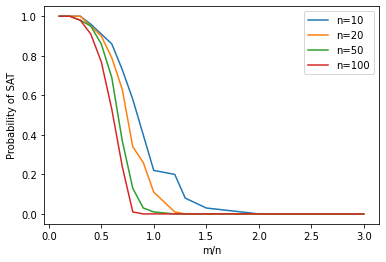

In [7]:
import matplotlib.pyplot as plt
for q in range(len(nlist)):
    plt.plot(r,prob_Sat[q])
legend=plt.legend(('n=10','n=20','n=50','n=100'))
plt.xlabel('m/n')
plt.ylabel('Probability of SAT')

# Multiprocessing

In [5]:
import ray
ray.init(num_cpus=32)

2023-03-13 14:37:04,502	INFO worker.py:1518 -- Started a local Ray instance.


Python version:,3.8.11
Ray version:,2.0.1


In [6]:
import os
import multiprocessing
print(os.cpu_count())
print(len(os.sched_getaffinity(0)))
print(multiprocessing.cpu_count())

32
32
32


# Belief Propagation

In [7]:
# get optimal state and marginalized single qubit probabilities from BP 

from factor_graph import FactorGraph
from node import VarNode, FactorNode
import numpy as np


def BP( cors,pols):
        nqubits=n
        fg = FactorGraph()
        xs = [VarNode(name="x"+str(i), graph=fg) for i in range(nqubits)]

        # Create functions
        fs = []
        j=0

        #pol0 = -1
        for k in range(n):
            p = (1+pols[k])/2
            f = FactorNode(name="f"+str(j), cpd=np.array([p,1-p]),graph=fg,ordered_variables = (xs[k],))
            fs += [f]
            j += 1

        k=0
        for e in list(mod.J.keys()):
            if e[0]>e[1]:
                e = (e[1],e[0])
            p = (1+cors[k])/2 
            f = FactorNode(name="f"+str(j), cpd=np.array([[p  , 1-p],[1-p, p  ]]), graph=fg,
                           ordered_variables=(xs[e[0]],xs[e[1]]))
            fs += [f]                                                        
            j+=1
            k+=1


        fg.add_var_nodes(xs)
        fg.add_factor_nodes(fs)
        k=0

        for k in range(n):
            fg.add_edge(xs[k],fs[k])
            k+=1

        for e in list(mod.J.keys()):
            if e[0]>e[1]:
                e = (e[1],e[0])
            fg.add_edge(xs[e[0]], fs[k])
            fg.add_edge(fs[k], xs[e[1]])
            k+=1    

        #circle = np.array([[6*np.cos(i/nqubits*2*np.pi),6*np.sin(i/nqubits*2*np.pi)] for i in range(nqubits)])
        #pos = {xs[i]: tuple(circle[i]) for i in range(nqubits)}
        #pos.update({fs[i]: tuple(np.mean(circle[list(list(mod.G.edges())[i])],axis=0)) for i in range(len(list(mod.G.edges())))})
        #fg.save_graph_fig(num=1, pos=pos)
        # fg.sum_product(node=b)

        fg.loopy_max_product(iterations=300, epsilon=1e-8, plot_errors=True)
        map_beliefs = fg.get_beliefs()
        #print('map_beliefs',map_beliefs)
        result=reduce(lambda x,y:  x+y,[str(np.argmax(map_beliefs[k])) for k in map_beliefs])
        #print('results',result)
        return(result)


        #print('beliefs',fg.get_beliefs())

In [8]:
from QAOA import *

from SAT import P1in2SAT,P1in3SAT,solve_instances

/u/nmohseni/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
def ps(p):
    ps= [p]
    print(ps)
    while ps[-1] >1:
        ps = ps + [int(ps[-1]/2+0.5)]
        print(ps)
    return ps[::-1]

ps(5)

[5]
[5, 3]
[5, 3, 2]
[5, 3, 2, 1]


[1, 2, 3, 5]

In [40]:
ps(P)

[10]


[1, 2, 3, 5, 10]

# QAOA,SA,BP performance

In [ ]:
%%time
from functools import reduce
#np.set_printoptions(threshold=np.nan)
Seed=123
#this function is used for intializing the variational parameters
def ps(p):
    ps= [p]
    print(ps)
    while ps[-1] >1:
        ps = ps + [int(ps[-1]/2+0.5)]
    return ps[::-1]


@ray.remote
def Simulated_annealing(mod):
    x=dimod.SimulatedAnnealingSampler().sample_ising(mod.h, mod.J)
    index=np.argmin([x.record[k][1] for k in range(len(x.record))])
            # print best state:
    z=reduce(lambda x,y: x+y, [str(int(-s/2+0.6)) for s in x.record[index][0]]),x.record[index][1] 
    #print(z)
    num_unsat_annealing=violateNum_basis(z[0],mod.A)
    return num_unsat_annealing


@ray.remote
def QAOA_BP_violate(mod,P,Seed):
    np.random.seed(Seed)
    n,m = mod.A.shape
    res, solver = mod.runiiIdeal(ps(P))
    #print(mod.operator())
    cir=solver.construct_circuit(res._optimal_parameters,mod.operator())[0]
    state_i=CircuitStateFn(cir).eval()
    num=violateNum_state(state_i, n,mod.A)
    #Num_i=((m-num)/m)
    
    polOps = mod.pol()
    corOps = mod.cor()
    pols = [mod.idealExp(op,res.optimal_point,solver) for op in polOps]
    cors = [mod.idealExp(op,res.optimal_point,solver) for op in corOps]
    result=BP(cors,pols)
    numBP=violateNum_basis(result,mod.A)
    #print(str(result),mod.operator().eval(str(result)).eval(str(result)))
    return num, numBP   

@ray.remote
def maximalNumberSat(A):
    n, m = A.shape
    violated = np.array([violateNum_basis(np.binary_repr(num, width=n), A) for num in range(2**n)])
#     print(m-violated,m)
#     print('exact',np.max(m-violated)/m)
    return np.max(m-violated) 

        
np.random.seed(Seed)

num_samples=10
AA=num_samples*[None]
JJ=num_samples*[None]
hh=num_samples*[None]
num_unsat_BP=num_samples*[None]
num_max_sat=num_samples*[None]
num_unsat_QAOA=num_samples*[None]
num_unsat_annealing=num_samples*[None]
num_unsat_x_algoritm=num_samples*[None]
xx=num_samples*[None]
zz=num_samples*[None]






num_max_sat=[]
xx=[]
num_unsat_annealing=[]




m=np.arange(1,15,dtype=int)
n=8
P=14
for j in range(num_samples):
    for i in m:
        mod = Hamiltonian(n,i,ksat=True)
        num_max_sat.append(maximalNumberSat.remote(mod.A))
        num_unsat_annealing.append( Simulated_annealing.remote(mod))
        xx.append(QAOA_BP_violate.remote(mod,P,Seed)) 
#         num_unsat_BP[j] = QAOA_BP_violate.remote(mod,P,Seed)[1]
        #x=solve_instances(np.array(mod.A, dtype='int32'))
       # num_unsat_x_algoritm.append(np.count_nonzero(x==0))
        
num_unsat_annealing = ray.get(num_unsat_annealing)
num_max_sat_=ray.get( num_max_sat)
num_unsat = ray.get(xx)
num_unsat_QAOA, num_unsat_BP =  list(zip(*num_unsat))[0],  list(zip(*num_unsat))[1]
            
     

(pid=16867) /u/nmohseni/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
(pid=16867)   warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
(pid=16859) /u/nmohseni/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
(pid=16859)   warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
(pid=16854) /u/nmohseni/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
(pid=16854)   warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
(pid=16858) /u/nmohseni/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this vers

(QAOA_BP_violate pid=16856) [14]
(QAOA_BP_violate pid=16859) [14]
(QAOA_BP_violate pid=16852) [14]
(QAOA_BP_violate pid=16855) [14]
(QAOA_BP_violate pid=16858) [14]
(QAOA_BP_violate pid=16866) [14]
(QAOA_BP_violate pid=16869) [14]
(QAOA_BP_violate pid=16876) [14]
(QAOA_BP_violate pid=16854) [14]
(QAOA_BP_violate pid=16860) [14]
(QAOA_BP_violate pid=16875) [14]
(QAOA_BP_violate pid=16864) [14]
(QAOA_BP_violate pid=16867) [14]
(QAOA_BP_violate pid=16872) [14]
(QAOA_BP_violate pid=16877) [14]
(QAOA_BP_violate pid=16853) [14]
(QAOA_BP_violate pid=16874) [14]
(QAOA_BP_violate pid=16862) [14]
(QAOA_BP_violate pid=16868) [14]
(QAOA_BP_violate pid=16865) [14]
(QAOA_BP_violate pid=16879) [14]
(QAOA_BP_violate pid=16851) [14]
(QAOA_BP_violate pid=16873) [14]
(QAOA_BP_violate pid=16847) [14]
(QAOA_BP_violate pid=16881) [14]
(QAOA_BP_violate pid=16880) [14]
(QAOA_BP_violate pid=16850) [14]
(QAOA_BP_violate pid=16857) [14]
(QAOA_BP_violate pid=16863) [14]
(QAOA_BP_violate pid=16849) [14]
(QAOA_BP_v

(QAOA_BP_violate pid=16849) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16849)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16849) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16849)   ax2.plot(np.log(errors))
(QAOA_BP_violate pid=16850) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16850)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16850) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16850)   ax2.plot(np.log(errors))
(QAOA_BP_violate pid=16864) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16864)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16864) /zeropoint/u/nmohseni/notebooks/L

(QAOA_BP_violate pid=16850) [14]
(QAOA_BP_violate pid=16849) [14]
(QAOA_BP_violate pid=16864) [14]
(QAOA_BP_violate pid=16877) [14]


(QAOA_BP_violate pid=16861) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16861)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16861) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16861)   ax2.plot(np.log(errors))
(QAOA_BP_violate pid=16872) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16872)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16872) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16872)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16861) [14]
(QAOA_BP_violate pid=16872) [14]


(QAOA_BP_violate pid=16865) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16865)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16865) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16865)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16865) [14]


(QAOA_BP_violate pid=16857) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16857)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16857) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16857)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16857) [14]


(QAOA_BP_violate pid=16853) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16853)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16853) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16853)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16853) [14]


(QAOA_BP_violate pid=16879) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16879)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16879) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16879)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16879) [14]


(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16863) [14]


(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16863) [14]


(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16863) [14]


(QAOA_BP_violate pid=16867) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16867)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16867) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16867)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16867) [14]


(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16863) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16863)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16863) [14]


(QAOA_BP_violate pid=16866) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16866)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16866) [14]


(QAOA_BP_violate pid=16867) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16867)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16867) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16867)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16867) [14]


(QAOA_BP_violate pid=16867) /zeropoint/u/nmohseni/notebooks/Lukas/node.py:96: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16867)   self.log_cpd = np.log(cpd)
(QAOA_BP_violate pid=16867) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16867)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16867) [14]


(QAOA_BP_violate pid=16877) /zeropoint/u/nmohseni/notebooks/Lukas/factor_graph.py:190: RuntimeWarning: divide by zero encountered in log
(QAOA_BP_violate pid=16877)   ax2.plot(np.log(errors))


(QAOA_BP_violate pid=16877) [14]


Text(0.5, 1.0, '1-3-SAT,N=8')

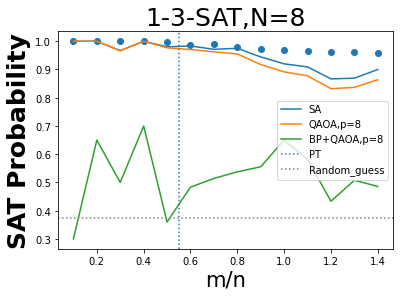

In [38]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/m,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/m,axis=0))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/m,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
plt.scatter(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=8','BP+QAOA,p=8','PT','Random_guess'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-2-SAT,N=8',fontsize=25)

Text(0.5, 1.0, '1-3-SAT,N=8')

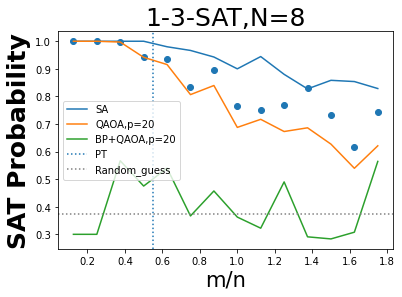

In [32]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/m,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/m,axis=0))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/m,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
plt.scatter(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=20','BP+QAOA,p=20','PT','Random_guess'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT,N=8',fontsize=25)

Text(0.5, 1.0, '1-3-SAT,N=8')

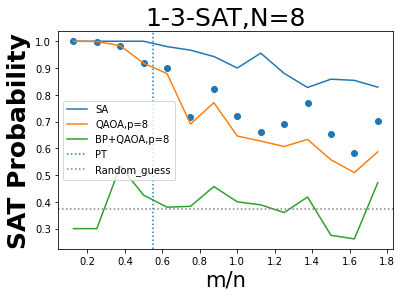

In [28]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/m,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/m,axis=0))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/m,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
plt.scatter(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=8','BP+QAOA,p=8','PT','Random_guess'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT,N=8',fontsize=25)

Text(0.5, 1.0, '1-3-SAT,N=8')

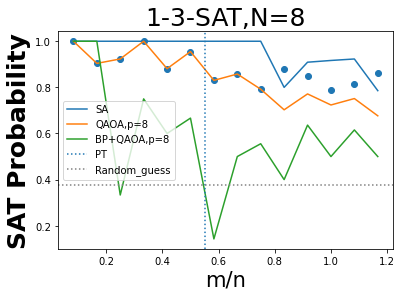

In [25]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/m,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/m,axis=0))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/m,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
plt.scatter(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=8','BP+QAOA,p=8','PT','Random_guess'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT,N=8',fontsize=25)

Text(0.5, 1.0, '1-3-SAT,N=12')

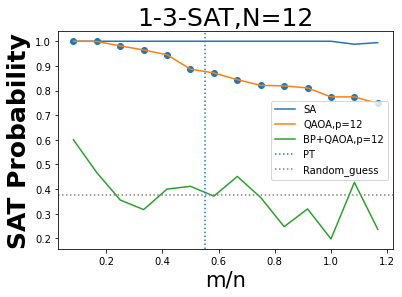

In [8]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
plt.scatter(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=12','BP+QAOA,p=12','PT','Random_guess'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT,N=12',fontsize=25)

Text(0.5, 1.0, '1-3-SAT,N=8')

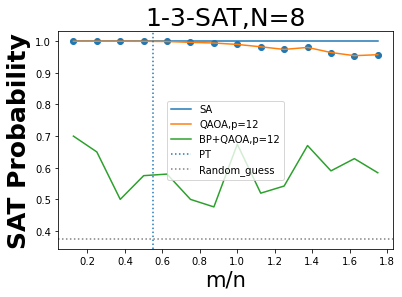

In [42]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
plt.scatter(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=12','BP+QAOA,p=12','PT','Random_guess'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT,N=8',fontsize=25)

Text(0.5, 1.0, '1-2-SAT')

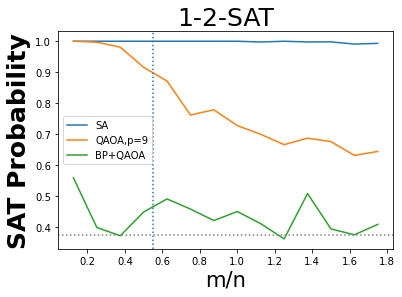

In [31]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=9','BP+QAOA'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-2-SAT',fontsize=25)

Text(0.5, 1.0, '1-2-SAT')

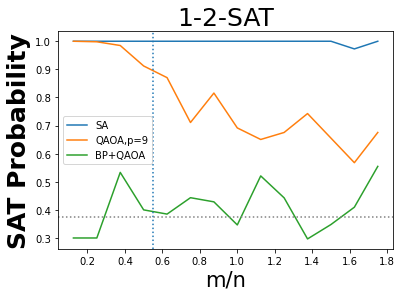

In [29]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=9','BP+QAOA'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-2-SAT',fontsize=25)

Text(0.5, 1.0, '1-2-SAT')

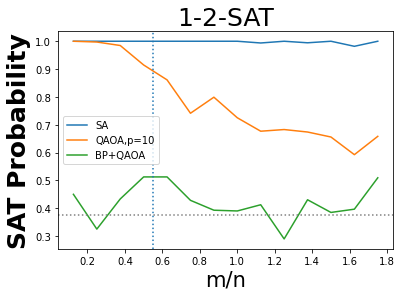

In [27]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =3./8, color='gray',ls=':')
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=9','BP+QAOA'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-2-SAT',fontsize=25)

Text(0.5, 1.0, '1-2-SAT')

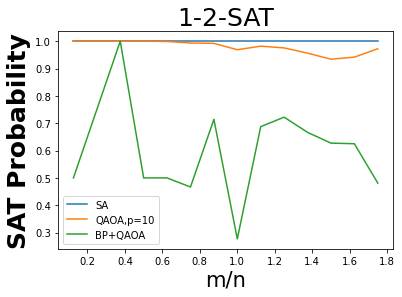

In [19]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=10','BP+QAOA','X'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-2-SAT',fontsize=25)

Text(0.5, 1.0, '1-3-SAT')

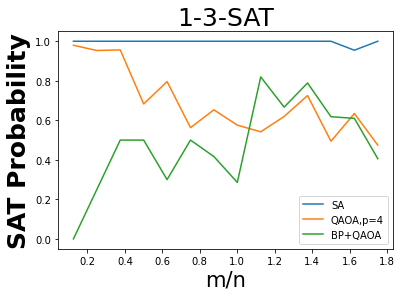

In [33]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=4','BP+QAOA','X'))
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT',fontsize=25)

Text(0.5, 1.0, '1-3-SAT')

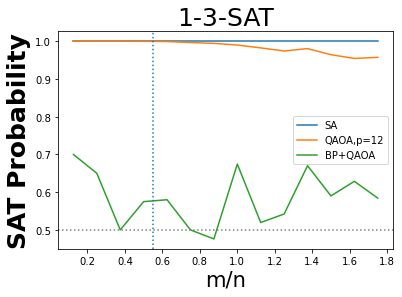

In [37]:
# 10 samples
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=12','BP+QAOA','X'))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =0.5, color='gray',ls=':')
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT',fontsize=25)

Text(0.5, 1.0, '1-3-SAT')

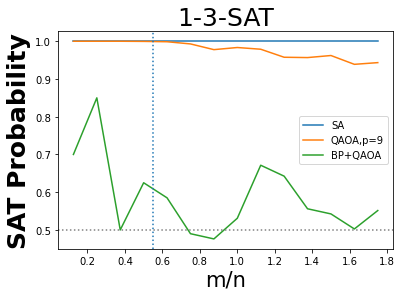

In [21]:
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=9','BP+QAOA','X'))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =0.5, color='gray',ls=':')
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT',fontsize=25)

Text(0.5, 1.0, '1-3-SAT')

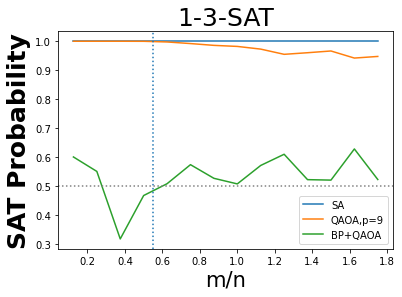

In [24]:
# 40 samples
num_unsat_annealing_f=np.array(num_unsat_annealing).reshape(num_samples,len(m))
num_unsat_QAOA_f=np.array(num_unsat_QAOA).reshape(num_samples,len(m))
num_unsat_BP_f=np.array(num_unsat_BP).reshape(num_samples,len(m))
num_max_sat_f=np.array(num_max_sat_).reshape(num_samples,len(m))

#num_unsat_x_algoritm_f=np.array(num_unsat_x_algoritm).reshape(num_samples,len(m))

#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_annealing_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_QAOA_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,np.average(np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f,axis=0)/m)
plt.plot(m/n,np.average((np.repeat(m[:,np.newaxis],num_samples,axis=1).T-num_unsat_BP_f)/num_max_sat_f,axis=0))
#plt.plot(m/n,prob_Sat[0])
legend=plt.legend(('SA','QAOA,p=9','BP+QAOA','X'))
plt.axvline(x =0.55,ls=':')
plt.axhline(y =0.5, color='gray',ls=':')
plt.xlabel('m/n',fontsize=21)
plt.ylabel('SAT Probability',fontname="cal",fontweight="bold",fontsize=25)
plt.title('1-3-SAT',fontsize=25)